In [1]:
from pylab import arange

# Del 0: Vi kan indeksere arrayer for å hente ut eller oppdatere elementer

I dette opplegget skal vi simulere biologiske system ved hjelp av rekursive rekker. Tidligere har vi brukt rekursive rekker for å simulere renter på en bankkonto, men da kunne vi kun se et og et år om gangen. Men hva om vi ønsker å plotte pengeutviklingen som funksjon av tid. Vel da må vi kunne lagre pengene vi har på bankkontoen vår, og for å gjøre det bruker vi array-indeksering.

Det har seg nemlig slik at om vi har en array, `x`, så kan vi hente ut element fra denne arrayen med klammeparanteser, det første elementet i `x`-arrayen vår kan vi få tak i ved å skrive `x[0]`, det andre kan vi få ved å skrive `x[1]`, osv. Vi teller altså fra en her og. Under har vi en figur som viser hvordan dette virker for en array med åtte element i seg.

<img src="https://raw.githubusercontent.com/kodeskolen/tekna_v21_videre/main/dag2/notebooks/Befolkningsvekst/bilder/array_indexing.png" width="600px">

La oss nå se på et lite eksempel:

In [2]:
x = arange(5)
print(x)
print(x[0])

[0 1 2 3 4]
0


Vi kan og endre verdien til et element i arrayet, hvis vi vil endre verdien til det første elementet i arrayen vår til `9`, kan vi skrive `x[0] = 9`. La oss se på det.

In [3]:
x[0] = 9

print(x)

[9 1 2 3 4]


# Del 1: Simulere eksponentiell vekst av populasjoner

<img src="https://raw.githubusercontent.com/kodeskolen/tekna_v21_videre/main/dag2/notebooks/Befolkningsvekst/bilder/kaniner_1.png" >

Nå skal vi simulere hvordan dyrepopulasjoner utvikler seg. La oss se for oss at vi har en øy med $200$ kaniner på, også skal vi simulere hvordan kaninbefolkningen endrer seg. Det første, enkleste eksempelet vil jo være at det er en konstant økning av kaniner hvert år, f.eks. kan det bli født 100 nye kaniner hvert år. Matematisk, så kan vi skrive den modellen slik:

$ \Large{k_{t} = k_{t-1} + 200}, $

hvor $k_t$ er antall kaniner etter $t$ år. Denne lineære veksten er veldig urealistisk. Vekstraten til dyrene er jo avhengig av hvor mange dyr vi har på øya vår. Hvis vi ikke har noen dyr på øya, så kan vi vel ikke få 200 kaniner neste år!? Hvis vi har to kaniner, så vil vekstraten være mindre enn hvis vi har 4 kaniner, for det er jo bare halvparten så mange som kan få nye kaninunger. Det er derfor naturlig å tenke at vekstraten til kaniner er proposjonal med antall kaniner vi har på øya, altså blir den slik:

$ \Large{k_{t} = k_{t-1} + f k_{t-1}}, $

hvor $k_t$ er antall kaniner i år $t$, $k_{t-1}$ er antall kaniner året før og $f$ er fødselsraten. Om vi bruker denne modellen for å simulere systemet vårt så vil jo ingen kaniner dø. Igjen så vet vi at hvis vi har 100 kaniner så kan dobbelt så mange dø som om vi har 50 kaniner, og det er derfor logisk å tenke at dødsraten er proposjonal med antall kaniner på øya fra før. Matematisk blir det

$ \Large{k_{t} = k_{t-1} + f k_{t-1} - d k_{t-1}}, $

hvor $d$ er dødsraten til kaninene. Dette ser vi at vi kan skrive om til å bli


$ \Large{k_{t} = k_{t-1} + r k_{t-1}}, $

hvor $r=(f - d)$ er vekstraten til kaninene våre. Hvis vi bruker programmering, så får vi:


<code style="font-size: 22pt">k[t] = k[t-1] + r*k[t-1]</code>

La oss simulere systemet med en dødsrate, $d=0.1$ og fødselsrate, $f=0.2$

In [4]:
from pylab import zeros

antall_år = 10

dødsrate = 0.1
fødselsrate = 0.2
vekstrate = fødselsrate - dødsrate

k = zeros(antall_år)
k[0] = 200

for t in range(1,antall_år):
    k[t] = k[t-1] + vekstrate*k[t-1]

print(k)

[200.        220.        242.        266.2       292.82      322.102
 354.3122    389.74342   428.717762  471.5895382]


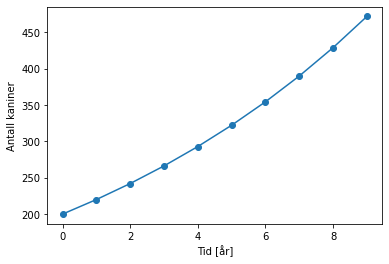

In [5]:
from pylab import plot, show, xlabel, ylabel

plot(range(antall_år), k, '-o')
xlabel('Tid [år]')
ylabel('Antall kaniner')
show()

Men hva skjer om vi simulerer øya over lengre tid?

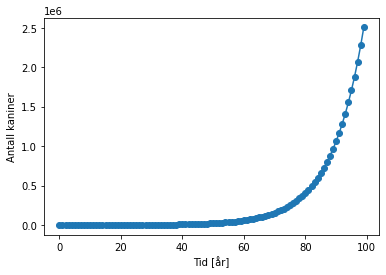

In [6]:
antall_år = 100

dødsrate = 0.1
fødselsrate = 0.2
vekstrate = fødselsrate - dødsrate

k = zeros(antall_år)
k[0] = 200

for t in range(1, antall_år):
    k[t] = k[t-1] + vekstrate*k[t-1]


plot(range(antall_år), k, '-o')
xlabel('Tid [år]')
ylabel('Antall kaniner')
show()

Vi ser at vi får ca 2.5 millioner dyr på øya. Med denne modellen vil befolkningen bare vokse helt uhemmet, og det har den ikke plass til!

<img src="https://raw.githubusercontent.com/kodeskolen/tekna_v21_videre/main/dag2/notebooks/Befolkningsvekst/bilder/kaniner_3.png">

# Del 2: Bærekraftig vekst
Den matematiske modellen vi har lagd så langt har ikke noen form for *bærekraftig vekst*. Øya vår har jo ikke mat, eller plass, til uendelig med kaniner. Derfor ønsker vi en modell hvor vekstraten endrer seg basert på hvor mange kaniner som er på øya fra før. Vi ønsker altså en modell på formen:

$ \Large{k_{t} = k_{t-1} + r(k_{t-1}) k_{t-1}}, $

som med kode blir dette:

<code style="font-size: 22pt">k[t] = k[t-1] + vekstrate(k[t-1])*k[t-1]</code>

Det naturlige spørsmålet vårt nå er hvilken form vi tror at vekstraten, $r(k)$, skal ha. La oss starte med noen observasjoner.

 1. Øya har en bæreevne, $N$, som er antallet kaniner øya har plass og mat til.
 1. Hvis $k_t \approx 0$ så ønsker vi eksponensiell vekst for da er bæreevnen mye høyere enn antallet dyr. 
    * Altså er den ubegrensede vekstraten, $r(0) = r_0 > 1$.
 1. Hvis $k_t \approx N$ så ønsker vi at det skal være ca like mange dyr på øya hvert år.
    * Altså er $r(N) = 1$.

Den letteste måten å få en funksjon på denne formen er å tenke seg en rett linje som går igjennom punktene $(0, r_0)$ og $(K, 0)$, slik vi ser i figuren under

<img src="https://raw.githubusercontent.com/kodeskolen/tekna_v21_videre/main/dag2/notebooks/Befolkningsvekst/bilder/vekstmengde.png" width="600px" />

Hvis vi bruker funksjonen over for den relative vekstraten så får vi dette uttrykket for $r$:

$ \Large{r(k) = r_0 \left(1 - \frac{k}{N} \right)}. $

## Oppgave 1 a)
Lag en funksjon  
`vekstrate(antall_kaniner)`
som tar inn antall kaniner og returnerer vekstraten for et system bæreevnen $N=5000$ og ubegrensede vekstrate $r_0=0.5$. 

**HINT:** Vekstraten for et gitt antall kaniner finner du ved å bruke formelen for $r(k)$ over hvor $r$ er `vekstrate` og $k$ er `antall_kaniner`. 

In [7]:
def vekstrate(antall_kaniner):
    return 0.5*(1 - antall_kaniner/5000)

## Oppgave 1b)
Test at funksjonen din virker ved å printe ut vekstraten til et system med vekstrate lik 0.5 og bæreevne lik 5000 kaniner. Test ut med 0 kaniner og med 5000 kaniner. Med 0 kaniner skal vekstraten være lik 0.5 og med 5000 kaniner skal vekstraten være 0.

In [8]:
print(vekstrate(0))
print(vekstrate(5000))

0.5
0.0


## Oppgave 2
Ta utgangspunkt i "eksponensiell vekst" koden og simuler en øy med en bæreevne på 5000 og ubegrenset vekstrate på 0.5 i 40 år.

### Hint:
 * Du trenger kun legge til to linjer kode
   * En av de kan være i løkka hvor du regner ut den ubegrensede vekstraten.

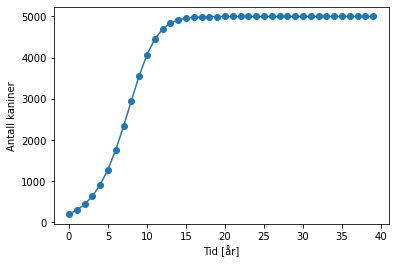

In [9]:
antall_år = 40

k = zeros(antall_år)
k[0] = 200

for t in range(antall_år - 1):
    k[t+1] = k[t] + vekstrate(k[t])*k[t]


plot(range(antall_år), k, '-o')
xlabel('Tid [år]')
ylabel('Antall kaniner')
show()

## Oppgave 3
Gjør om koden over til å bruke en glidebryter (slider) som kan endre den ubegrensede vekstraten og bæreevnen. Vekstraten skal kunne være mellom `0.0` og `3.5` og bæreevnen skal kunne være mellom `100` og `10000`.

### Hint:
  * Du må opprette en funksjon som tar inn vekstraten og bæreevnen, simulerer øya og plotter resultatet.
    * Denne funksjonen kan f.eks. hete `plott_bærekraftig_vekst(bæreevne, ubegrenset_vekstrate)`
  * Inni denne funksjonen kan du opprette en ny vekstrate-funksjon
  * Du må bruke `interact` funksjonen, hvis du ikke husker hvordan den fungerte kan du se på *Intro til notebook* notatboka.

In [10]:
from ipywidgets import interact

def plott_bærekraftig_vekst(bæreevne, ubegrenset_vekstrate):
    def vekstrate(antall_kaniner):
        return ubegrenset_vekstrate*(1 - antall_kaniner/bæreevne)
    antall_år = 40

    k = zeros(antall_år)
    k[0] = 200

    for t in range(antall_år - 1):
        k[t+1] = k[t] + vekstrate(k[t])*k[t]


    plot(range(antall_år), k, '-o')
    xlabel('Tid [år]')
    ylabel('Antall kaniner')
    show()
    
interact(plott_bærekraftig_vekst, bæreevne=(100, 10000), ubegrenset_vekstrate=(0.0, 3.5))

interactive(children=(IntSlider(value=5050, description='bæreevne', max=10000, min=100), FloatSlider(value=1.7…

<function __main__.plott_bærekraftig_vekst(bæreevne, ubegrenset_vekstrate)>

## Oppgave 4
Utforsk effekten av forskjellige parametre på simuleringen.

# Del 3: Rovdyr-byttedyr dynamikk

La oss nå tenke oss at vi, istedenfor å introdusere bare kaniner til øya vår, introduserer både kaniner og gauper. Før vi kan beskrive et slikt system matematisk så bør vi tenke hvordan det gir mening at det biologiske systemet utvikler seg. Så, når vi har kommet frem til det, kan vi tenke på hvordan vi kan beskrive et slikt system matematisk.

<img src="https://raw.githubusercontent.com/kodeskolen/tekna_v21_videre/main/dag2/notebooks/Befolkningsvekst/bilder/kaniner_2.png">

Hvis vi skal tenke oss hvordan øya er, kan vi komme frem til disse fire reglene:
 1. Hvis det ikke er noen gauper tilstede, så utvikler kaninpopulasjonen seg som om det bærekraftig vekst.
 2. Jo flere gauper jo høyere blir dødsraten til kaninene.
 3. Bæreevnen til gaupene er avhengig av antallet kaniner.
 4. gaupene dør også av naturlige årsaker som ikke er relatert til mengden kaniner som er tilgjengelig.
La oss nå sette opp likninger som tar hensyn til alle disse reglene.

## Kaniner:
Vi har allerede modellert kaninbestanden med en bærekraftig vekst-likning:

$ \Large{k_{t+1} = r(k_t) k_t.} $

### Kaniner som blir jaktet:
Når kaninene blir jaktet på trenger vi vite hvor mange kaniner gaupene spiser. Hvis hver gaupe har en apetitt, altså et visst antall kaniner de vil spise, vil vi få en proposjonalitetssammenheng mellom antall gauper og dødsraten. Vi kan bruke variabelen, $a_u$ for å beskrive gaupeappetitten, og få denne likningen for kaninbestanden:

$ \Large{k_{t+1} = r(k_t) k_t - (a_u g_t) k_t,} $

hvor $g_t$ er antallet gauper i år $t$. 

### Den relative vekstraten for kaniner: 
Siden kaniner blir jaktet på vet vi empirisk at kaninbestanden ikke vil nærme seg bæreevnen til øya — de blir spist av gaupene lenge før det. Dermed trenger vi ikke bruke den kompliserte formelen for relativ vekstrate fra forrige avsnitt. Istedenfor kan vi modellere fødselsraten til kaninene slik vi gjorde i første avsnitt, og dermed få likninger som er litt lettere å håndtere. Hvis vi gjør det får vi denne likningen for harebestanden:

$ \Large{k_{t+1} = k_t + f_k k_t - (a_g g_t) k_t.} $

## Gauper:
Bæreevnen til gaupepopulasjonen er gitt ved antallet kaniner på øya. Igjen, hvis hver gaupe må spise 500 kaniner i året for å overleve, så er bæreevnen til Gaupene proposjonal med antallet kaniner. Dermed, hvis vi antar at antallet gaupeunger som overlever er proposjonalt med antall gauper og antall kaniner får vi denne likningen for gaupepopulasjonen:

$ \Large{g_{t+1} = g_t + (f_g k_t) g_t} $


### Gauper dør også:
Siden det ikke er noen som jakter på gauper så kan vi anta at de dør med en konstant frekvens. Altså, hvor mange gauper som dør i løpet av et år er proposjonalt med hvor mange gauper som er på øya. Hvis vi kombinerer det med likningen over får vi:

$ \Large{g_{t+1} = g_t + (f_g k_t) g_t - d_g g_t.} $


## Sammendrag av modellen:
Bestanden kaniner og gauper kan vi altså beskrive med disse to likningene:

$ \Large{k_{t+1} = k_t + f_k k_t - (a_g g_t) k_t.} $
$ \Large{g_{t+1} = g_t + (f_g k_t) g_t - d_g g_t,} $

Her ble det mange konstanter gitt! Jeg liker å visualisere disse likningene slik:

<img src="https://raw.githubusercontent.com/kodeskolen/tekna_v21_videre/main/dag2/notebooks/Befolkningsvekst/bilder/rovdyr_byttedyr_byttedyr.png" width="600px">
<img src="https://raw.githubusercontent.com/kodeskolen/tekna_v21_videre/main/dag2/notebooks/Befolkningsvekst/bilder/rovdyr_byttedyr_rovdyr.png" width="600px">

Antallet kaniner neste år er gitt ved antallet kaniner i år, pluss antallet nye kaniner, minus antallet kaniner som blir spist av gaupene. Tilsvarende er antallet gauper neste år gitt ved antallet gauper dette året, pluss antallet nye gauper som det er mat til, minus antallet gauper som dør. Hvis vi vil programmere det, kan vi skrive det slik:

<code style="font-size: 22pt">k[t+1] = k[t] + f_k * k[t] - a_g * k[t] * g[t]</code>

<code style="font-size: 22pt">g[t+1] = g[t] + f_g * k[t] * g[t] - d_g * g[t]</code>

### Sammendrag over størrelsene:
Her ble det mange variabler, så la oss se grundigere på dem
  * $k_t$ - Antall kaniner i år $t$
  * $g_t$ - Antall gauper i år $t$
  * $f_k$ - Den relative fødselsraten til kaniner.
  * $f_g$ - Den relative fødselsraten til gauper. 
  * $a_g$ - Appetitten til gauper.
  * $d_g$ - Den relative dødsraten til gauper.

Vi har altså et system hvor antallet kaniner kan vokse fritt om vi ikke har noen gauper til stede. Gaupene jakter på kaninene så hvis det er mange gauper tilstede så dør mange kaniner.

## Problemer med denne modellen:
Det er dessverre et problem med denne modellen, og det er at den ser på år for år. Dessverre er det slik at utviklingen år for år er mer komplisert enn det vi har skrevet over. Men, fortvil ikke! For alt vi har sagt gir jo mening, men sammenhengene gjelder ikke for år, men for kortere tidsintervall, slik som dager. Det eneste vi trenger å gjøre for at modellen skal gjelde dag-for-dag istedenfor år-for-år er å dele konstantene våre på antall dager det er i et år.


## Valg av størrelser:
I denne simuleringen kommer vi til å bruke parametre som ikke helt gir mening hvis vi har et system med kun gauper kaniner. Grunnen til det er at hvis vi har "fornuftige" verdier for parameterne vil vi få så mange flere kaniner enn gauper at vi vil ikke kunne se noen endring i gaupebestanden over tid. Vi setter disse verdiene for parameterne:

  * $k_0 = 10.0$ - Antall kaniner det første året
  * $g_0 = 2.00$ - Antall gauper det første året
  * $f_k = 5.00$ - Den relative fødselsraten til kaniner per dag.
  * $f_g = 0.15$ - Den relative fødselsraten til gauper per dag. 
  * $a_g = 2.50$ - Appetitten til gauper per dag.
  * $d_g = 0.50$ - Den relative dødsraten til gauper per dag.


$
\Huge{k_{t+1} = k_t + f_k k_t - (a_g g_t) k_t}. 
$

$
\Huge{g_{t+1} = g_t + (f_g k_t) g_t - d_g g_t}. 
$

In [11]:
dager_i_år = 365
antall_år = 10
antall_dager = antall_år*dager_i_år

f_k = 5/dager_i_år
f_g = 0.15/dager_i_år
a_g = 1.5/dager_i_år
d_g = 0.5/dager_i_år

k = zeros(antall_dager)
k[0] = 10 # start mengde kaniner
g = zeros(antall_dager)
g[0] = 2

for t in range(antall_dager - 1):
    k[t+1] = k[t] + f_k*k[t] - a_g*g[t]*k[t]
    g[t+1] = g[t] + f_g*g[t]*k[t] -  d_g*g[t]

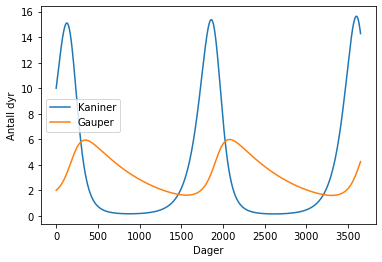

In [12]:
from pylab import legend
    
plot(range(antall_dager), k, label='Kaniner')
plot(range(antall_dager), g, label='Gauper')

legend()
xlabel('Dager')
ylabel('Antall dyr')
show()

Her har vi altså sett hvordan vi kan modellere gaupe og kanin populasjoner matematisk, men stemmer disse tallene overens med virkeligheten? Vel, det kan vi faktisk sjekke. Det har seg nemlig slik at det kanadiske selskapet Hudson's Bay Company samlet inn data på hvor mye hareskinn og gaupeskinn de fikk inn hvert år. 

<img src="bilder/gauperogharer.png">

Vi ser altså at mengden harer og gauper følger et periodisk mønster som likner veldig på det vi har i simuleringen vår! 

## Oppgave 6 a) (bonusoppgave): Interaktiv rovdyr-byttedyr simulering

Fyll inn skjelettkoden under for å lage en interaktiv simulering av et simulere et rovdyr-byttedyr system (du trenger kun fylle inn i linje 34 og 35).

In [13]:
def plott_rovdyr_byttedyr(
    kaniner_fødselsrate,
    gauper_fødselsrate,
    gaupeappetitt,
    gaupedødsrate,
    start_kaniner,
    start_gauper,
    antall_år
):
    # Tidsvariabler
    dager_i_år = 365
    alle_år = arange(antall_år*dager_i_år)/dager_i_år

    # Kanin og gaupevariabler
    antall_kaniner = zeros(antall_år*dager_i_år)
    antall_kaniner[0] = start_kaniner

    antall_gauper = zeros(antall_år*dager_i_år)
    antall_gauper[0] = start_gauper


    for år in range(antall_år*dager_i_år - 1):  # Hvert etterfølgende år
        # Simuleringsparametre
        f_k = kaniner_fødselsrate/365
        f_g = gauper_fødselsrate/365
        a_g = gaupeappetitt/365
        d_g = gaupedødsrate/365

        # Populasjonsvariabler
        k_t = antall_kaniner[år]  # Antall kaniner dette året
        g_t = antall_gauper[år]   # Antall gauper dette året

        # Finn antall kaniner og gauper neste år
        antall_kaniner[år+1] = k_t + (f_k * k_t - a_g * g_t * k_t)
        antall_gauper[år+1] = g_t + (f_g * k_t * g_t - d_g * g_t)
        
    
    # Vis frem antall kaniner som funksjon av år
    plot(alle_år, antall_kaniner, '-', label="Kaniner")
    plot(alle_år, antall_gauper, '-', label="Gauper")

    # Pynt på plottet
    xlabel("År")
    ylabel("Antall kaniner")
    legend()
    show()

## Oppgave 6 b) (bonusoppgave): Interaktiv rovdyr-byttedyr simulering

Bruk den interaktive simuleringen din for å se hva som skjer når du endrer parameterne i den.

In [14]:
interact(
    plott_rovdyr_byttedyr,
    kaniner_fødselsrate = 5,
    gauper_fødselsrate = 0.15,
    gaupeappetitt = 1.5,
    gaupedødsrate = 0.5,
    start_kaniner = 10,
    start_gauper = 2,
    antall_år=40,    
)

interactive(children=(IntSlider(value=5, description='kaniner_fødselsrate', max=15, min=-5), FloatSlider(value…

<function __main__.plott_rovdyr_byttedyr(kaniner_fødselsrate, gauper_fødselsrate, gaupeappetitt, gaupedødsrate, start_kaniner, start_gauper, antall_år)>